In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_bgr = cv2.imread('src/lena.jpg')
cv2.imshow('bgr', img_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()
img_bgr

array([[[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       [[125, 137, 226],
        [125, 137, 226],
        [133, 137, 223],
        ...,
        [122, 148, 230],
        [110, 130, 221],
        [ 90,  99, 200]],

       ...,

       [[ 60,  18,  84],
        [ 60,  18,  84],
        [ 58,  27,  92],
        ...,
        [ 84,  73, 173],
        [ 76,  68, 172],
        [ 79,  62, 177]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]],

       [[ 57,  22,  82],
        [ 57,  22,  82],
        [ 62,  32,  96],
        ...,
        [ 79,  70, 179],
        [ 81,  71, 181],
        [ 81,  74, 185]]

In [3]:
img_gray = cv2.imread('src/lena.jpg', cv2.IMREAD_GRAYSCALE)

img_gray

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

In [4]:
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)

img_yuv

array([[[162, 110, 184],
        [162, 110, 184],
        [162, 114, 181],
        ...,
        [170, 104, 181],
        [155, 106, 186],
        [128, 109, 191]],

       [[162, 110, 184],
        [162, 110, 184],
        [162, 114, 181],
        ...,
        [170, 104, 181],
        [155, 106, 186],
        [128, 109, 191]],

       [[162, 110, 184],
        [162, 110, 184],
        [162, 114, 181],
        ...,
        [170, 104, 181],
        [155, 106, 186],
        [128, 109, 191]],

       ...,

       [[ 43, 136, 164],
        [ 43, 136, 164],
        [ 50, 132, 165],
        ...,
        [104, 118, 189],
        [100, 116, 191],
        [ 98, 119, 197]],

       [[ 44, 134, 161],
        [ 44, 134, 161],
        [ 55, 131, 164],
        ...,
        [104, 116, 194],
        [105, 116, 195],
        [108, 115, 196]],

       [[ 44, 134, 161],
        [ 44, 134, 161],
        [ 55, 131, 164],
        ...,
        [104, 116, 194],
        [105, 116, 195],
        [108, 115, 196]]

In [10]:
def bgr2yuv(src):
    ''' 转换公式
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    U = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
    V = 0.5 * R - 0.4187 * G - 0.0813 * B + 128
    '''
    dst = np.zeros_like(src)
    B, G, R = cv2.split(src)
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    U = -0.1687 * R - 0.3313 * G + 0.5 * B + 128
    V = 0.5 * R - 0.4187 * G - 0.0813 * B + 128
    dst = cv2.merge([Y, U, V])
    dst = cv2.convertScaleAbs(dst)
    return dst

In [11]:
img_my_yuv = bgr2yuv(img_bgr)
h, w, c = img_my_yuv.shape
mse = np.sum((img_my_yuv - img_yuv) ** 2) / (h * w * c)
mse

32.75193659464518

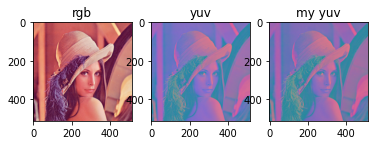

In [12]:
b, g, r = cv2.split(img_bgr)
img_rgb = cv2.merge([r, g, b])
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('rgb')
plt.subplot(1, 3, 2)
plt.imshow(img_yuv)
plt.title('yuv')
plt.subplot(1, 3, 3)
plt.imshow(img_my_yuv)
plt.title('my yuv')
plt.show()